### 주식 매도/매수 결정

In [1]:
import urllib.parse
import pandas as pd

MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'kind.krx.co.kr/corpgeneral/corpList.do'

def download_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]

    if not delisted:
        params['searchType'] = 13

    params_string = urllib.parse.urlencode(params)
    request_url = urllib.parse.urlunsplit(['http', DOWNLOAD_URL, '', params_string, ''])

    df = pd.read_html(request_url, header=0)[0]
    df.종목코드 = df.종목코드.map('{:06d}'.format)

    return df


kosdaq_stocks = download_stock_codes('kospi')
kosdaq_stocks.head(2)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
1,HSD엔진,082740,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진",2011-01-04,12월,고영열,http://www.hsdengine.com,경상남도


In [3]:
stock = input("Enter a stock_name: ")

Enter a stock_name:  삼성바이오로직스


In [4]:
stock_codeDF = kosdaq_stocks[ (kosdaq_stocks.회사명==stock) ][['회사명','종목코드']]
stock_codeDF

,회사명,종목코드
37,삼성바이오로직스,207940


In [5]:
stock_code = stock_codeDF.iloc[0]['종목코드']
stock_name = stock_codeDF.iloc[0]['회사명']
print(stock_name)
print(stock_code)

삼성바이오로직스
207940


Populating the interactive namespace from numpy and matplotlib


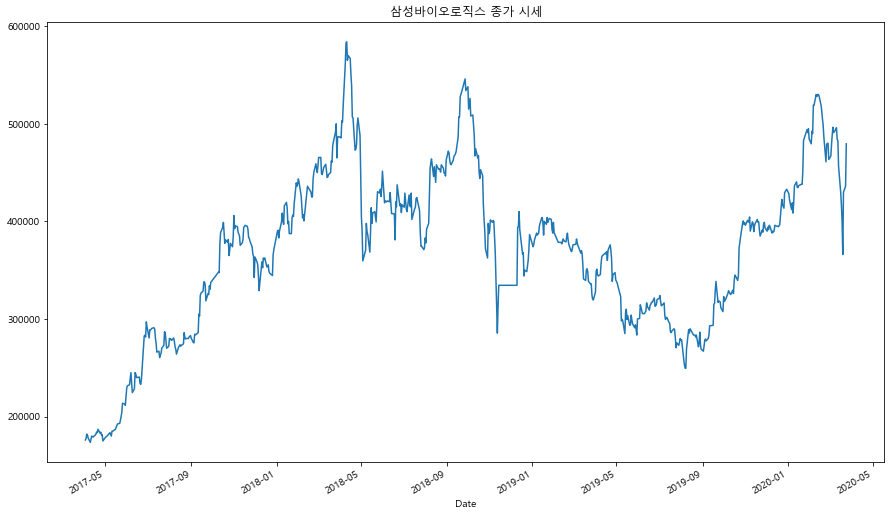

chart ok


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-18,425500,427500,400500,400500,276886,-0.040719
2020-03-19,410000,416000,352000,366000,470624,-0.086142
2020-03-20,383500,451000,371500,430000,586738,0.174863
2020-03-23,406000,454500,405500,436000,589740,0.013953
2020-03-24,452500,492000,448000,479500,367424,0.099771


In [8]:
# pip install finance-datareader
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
#font setting for window
#font setting for mac (AppleGothic)
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

end = date.today()
#start = date.today() - timedelta(14)
start = datetime.datetime(2017,4,1) #date.today() - timedelta(1)
#print(yesterday)

SEC = web.DataReader(stock_code, start, end)
SEC['Close'].plot(style='-')
plt.title(stock_name+" 종가 시세")
plt.show()

print("chart ok")
SEC.tail()

In [9]:
#import numpy as np
#SEC =  web.get_data_yahoo("005490.KS", start_past, end)
SEC["20d"] = np.round(SEC["Close"].rolling(window = 20, center = False).mean(), 2)
 
#pandas_candlestick_ohlc(SEC.loc[start:end,:], otherseries = "20d")

In [10]:
SEC["50d"] = np.round(SEC["Close"].rolling(window = 50, center = False).mean(), 2)
SEC["200d"] = np.round(SEC["Close"].rolling(window = 200, center = False).mean(), 2)
SEC['20d-50d'] = SEC['20d'] - SEC['50d']
SEC.tail()

,Open,High,Low,Close,Volume,Change,20d,50d,200d,20d-50d
Date,,,,,,,,,,
2020-03-18,425500,427500,400500,400500,276886,-0.040719,471650.0,475200.0,369085.0,-3550.0
2020-03-19,410000,416000,352000,366000,470624,-0.086142,465025.0,474140.0,369467.5,-9115.0
2020-03-20,383500,451000,371500,430000,586738,0.174863,462200.0,474570.0,370200.0,-12370.0
2020-03-23,406000,454500,405500,436000,589740,0.013953,460950.0,474890.0,370880.0,-13940.0
2020-03-24,452500,492000,448000,479500,367424,0.099771,460975.0,475750.0,371775.0,-14775.0


C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


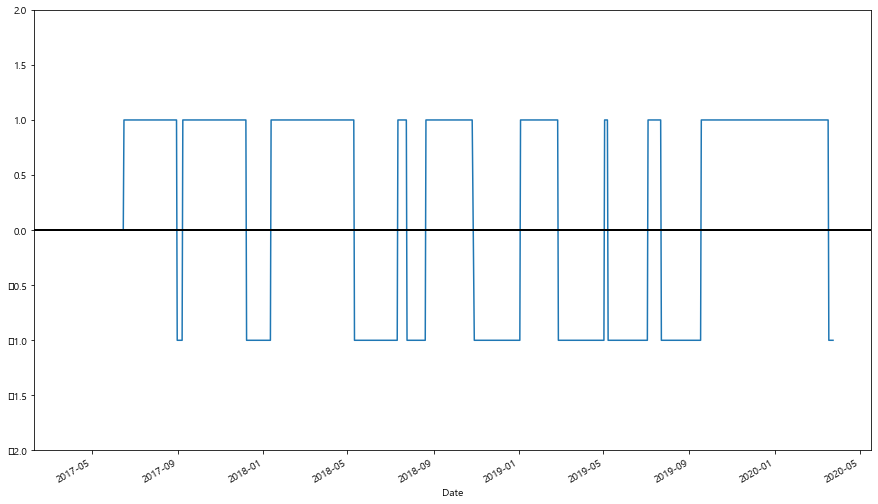

In [11]:

# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
SEC["Regime"] = np.where(SEC['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
SEC["Regime"] = np.where(SEC['20d-50d'] < 0, -1, SEC["Regime"])
SEC.loc[start:end,"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)